In [12]:
from tournament.agents.constant import AllC, AllD
from tournament.agents.pavlov import Pavlov
from tournament.agents.q_learning.tabular import TabluarQLearner
from tournament.agents.tft import TFTT, GenerousTFT, TitForTat
from tournament.environments.single import SingleRuleBasedAgentEnvironment
from tournament.environments.multiple import MultipleRuleBasedAgentEnvironment
from tournament.agents.agents import AGENTS
from tournament.agents.axelrod_first import (
    Davis,
    Downing,
    Feld,
    Grofman,
    Grudger,
    Joss,
    Nydegger,
    Shubik,
    SteinAndRapoport,
    TidemanAndChieruzzi,
    Tullock,
)
from tournament.agents.tft import (
    TFTT,
    TTFT,
    GenerousTFT,
    GradualTFT,
    OmegaTFT,
    TitForTat,
)
from tournament.tournament import RoundRobinTournament

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

# plt.rcParams["figure.figsize"] = (20, 12)
plt.rcParams["figure.figsize"] = (10, 6)


In [13]:
# env = SingleRuleBasedAgentEnvironment(TitForTat)
env = MultipleRuleBasedAgentEnvironment([
    TitForTat,
    # AllC,
    # TFTT,
    # TTFT,
    # GenerousTFT,
    # GradualTFT,
    OmegaTFT,
])

In [14]:
class TabularLearnerTest(TabluarQLearner):
    def __init__(self):
        super().__init__()
        self._lookback = 5
        self._epsilon = 0.2

agent = TabularLearnerTest()

In [15]:
env.train(
    trainee=agent,
    continuation_probability=1,
    limit=250,
    noise=0,
    repetitions=100,
    epochs=100,
)

[16:48:47] Commencement of training.
[16:48:47] Completed epoch 1: None
[16:48:48] Completed epoch 2: None
[16:48:49] Completed epoch 3: None
[16:48:49] Completed epoch 4: None
[16:48:50] Completed epoch 5: None
[16:48:50] Completed epoch 6: None
[16:48:51] Completed epoch 7: None
[16:48:52] Completed epoch 8: None
[16:48:53] Completed epoch 9: None
[16:48:53] Completed epoch 10: None
[16:48:54] Completed epoch 11: None
[16:48:55] Completed epoch 12: None
[16:48:56] Completed epoch 13: None
[16:48:56] Completed epoch 14: None
[16:48:57] Completed epoch 15: None
[16:48:58] Completed epoch 16: None
[16:48:58] Completed epoch 17: None
[16:48:59] Completed epoch 18: None
[16:49:00] Completed epoch 19: None
[16:49:00] Completed epoch 20: None
[16:49:01] Completed epoch 21: None
[16:49:02] Completed epoch 22: None
[16:49:02] Completed epoch 23: None
[16:49:03] Completed epoch 24: None
[16:49:04] Completed epoch 25: None
[16:49:04] Completed epoch 26: None
[16:49:05] Completed epoch 27: None


In [16]:
print(env.counts)

s = sum(env.counts.values())

print({a: env.counts[a] / s for a in env.counts})

{<Action.COOPERATE: 0>: 1441235, <Action.DEFECT: 1>: 3558765}
{<Action.COOPERATE: 0>: 0.288247, <Action.DEFECT: 1>: 0.711753}


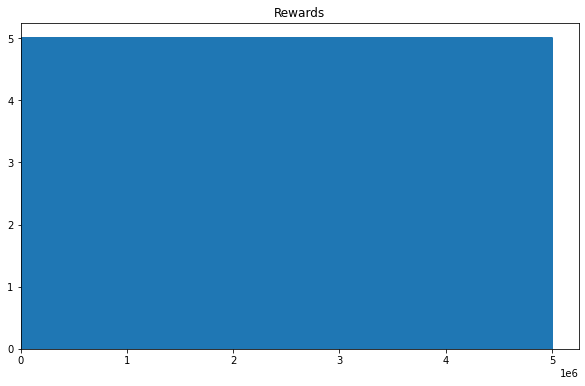

In [17]:
plt.title("Rewards")
plt.plot(env.rewards)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

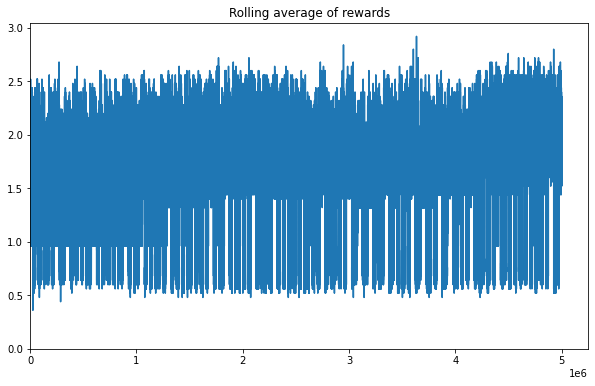

In [18]:
N = 25

plt.title("Rolling average of rewards")
plt.plot(np.convolve(env.rewards, np.ones(N), mode='valid') / N)
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

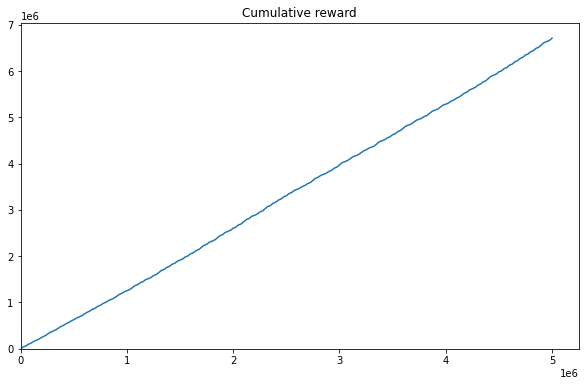

In [19]:
plt.title("Cumulative reward")
plt.plot(np.cumsum(env.rewards))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

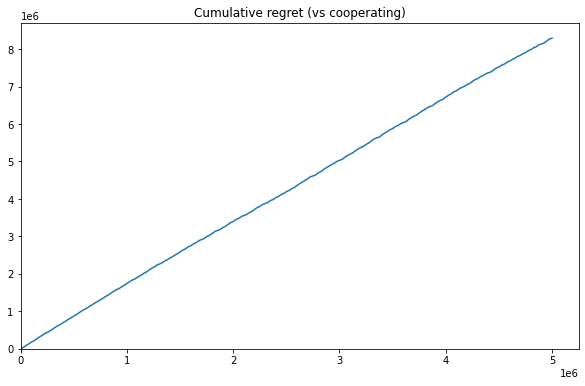

In [20]:
plt.title("Cumulative regret (vs cooperating)")
plt.plot(np.cumsum(3 - np.array(env.rewards)))
plt.xlim(left=0)
plt.ylim(bottom=0)
plt.show()

In [21]:
tournament = RoundRobinTournament(AGENTS, [agent])

scores, times = tournament.play(
    continuation_probability=0.99654, repetitions=20, jobs=12
)

results = [
    (agent, round(sum(scores[agent]) / len(scores[agent])), sum(times[agent]))
    for agent in scores
]
results.sort(key=lambda x: x[1], reverse=True)

for c, score, time in results:
    print(f"{c.__name__:<30} {score:<20} {time:<20}")


100%|██████████| 961/961 [00:27<00:00, 34.38matches/s] 

SecondByGraaskampKatzen        803                  5.172645999999999   
Borufsen                       796                  5.284563000000001   
Davis                          789                  9.032960999999998   
TidemanAndChieruzzi            777                  5.933304000000001   
TTFT                           772                  4.662579            
Champion                       772                  37.18445600000001   
GradualTFT                     771                  56.146542999999994  
Shubik                         765                  4.456400000000001   
SecondByWhiteK72R              762                  5.234293000000001   
SecondByWeiner                 754                  14.468188000000003  
Grofman                        753                  4.117989000000001   
GenerousTFT                    753                  4.304010999999999   
SecondByTidemanAndChieruzzi    753                  5.932136000000002   
TitForTat                      752                 